# Good Produce Image Classification
#### By John Harrigan

## Overview
By looking at over 30,000 images of healthy and rotten fruit, I am attempting to make a Neural Network model that can correctly classify if a fruit is rotten or not based only on its image. This is a simple binary classification that will look at one of nine different kinds of fruit to see if they are rotten under the understanding that all fruit decay in a very similar manner.

## Business Problem
![whole food](./Images/whole-foods-market.jpg)

Whole foods is a company that has succeeded because of their brand. They have built a brand of being a company that provides quality produce at reasonable prices. Every company knows that protecting your brand is important because many customers only give you their business because they trust that brand. Whole Foods hired me to help protect one of the most important items on their shelves, produce. Many people go to Whole Foods just so they can get quality produce that they can trust. So, naturally, Whole Foods wants to keep the quality as high as possible. My job was to make an image classification system that could look at all of the fruits that Whole Foods received and check to see if any of it was rotten.

## Data
The data for this project is a compiltion of two different datasets of images from Mendeley and Kaggle. Each dataset has images of multiple different kinds of fruit including: apples, oranges, bananas, grapes, strawberries, pomegranates, guava, lime, and jujubes. These images are divided up by type of fruit, and whether or not that fruit is rotten. I only used a sample of the entire dataset for this model because feeding in all 30,000 images would have taken a massive amount of time and processing power.

### imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import shutil
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.layers import Conv2D, Conv3D, MaxPooling2D, AveragePooling2D
from keras import regularizers
from random import sample
from tensorflow.keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

#import warnings
#warnings.filterwarnings("ignore")

## Organizing the Image Files
The files in the Mendeley dataset where orignally ordered by quality and then by the type of the fruit. For this project I needed them to be randomly split into train, test, and validation folders.

In [2]:
# getting the names of the files for each of the fruits so that I can aggregate them into good and bad fruit folders
good_a = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Apple_Good')
bad_a = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Apple_Bad')

good_b = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Banana_Good')
bad_b = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Banana_Bad')

good_gu = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Guava_Good')
bad_gu = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Guava_Bad')

good_l = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Lime_Good')
bad_l = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Lime_Bad')

good_o = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Orange_Good')
bad_o = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Orange_Bad')

good_p = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Pomegranate_Good')
bad_p = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Pomegranate_Bad')

good_gp = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Grape_Good')
bad_gp = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Grape_Bad')

good_j = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Jujube_Good')
bad_j = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Jujube_Bad')

good_s = os.listdir('multi_fruits/Processed Images_Fruits/Good Quality_Fruits/Strawberry_Good')
bad_s = os.listdir('multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/Strawberry_Bad')

good_images = good_a + good_b + good_gu + good_l + good_o + good_p + good_gp + good_j + good_s
bad_images = bad_a + bad_b + bad_gu + bad_l + bad_o + bad_p + bad_gp + bad_j + bad_s

In [111]:
# this is where I copy the images into the new aggregated folders so that it will be easier to 
# randomly split them into the train, test, and validation folders

os.mkdir('multi_good_all')
good_list = 'multi_fruits/Processed Images_Fruits/Good Quality_Fruits/'
bad_list = 'multi_fruits/Processed Images_Fruits/Bad Quality_Fruits/'

for image in good_a:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Apple_Good/' + image, new_path)
    
for image in good_b:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Banana_Good/' + image, new_path)
    
for image in good_gu:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Guava_Good/' + image, new_path)
    
for image in good_l:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Lime_Good/' + image, new_path)
    
for image in good_o:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Orange_Good/' + image, new_path)
    
for image in good_p:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Pomegranate_Good/' + image, new_path)
    
for image in good_gp:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Grape_Good/' + image, new_path)
    
for image in good_j:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Jujube_Good/' + image, new_path)
    
for image in good_s:
    new_path = 'multi_good_all/' + image
    shutil.copy(good_list + 'Strawberry_Good/' + image, new_path)
    
os.mkdir('multi_bad_all')
for image in bad_a:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Apple_Bad/' + image, new_path)
    
for image in bad_b:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Banana_Bad/' + image, new_path)
    
for image in bad_gu:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Guava_Bad/' + image, new_path)
    
for image in bad_l:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Lime_Bad/' + image, new_path)
    
for image in bad_o:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Orange_Bad/' + image, new_path)
    
for image in bad_p:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Pomegranate_Bad/'+ image, new_path)
    
for image in bad_gp:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Grape_Bad/'+ image, new_path)
    
for image in bad_j:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Jujube_Bad/'+ image, new_path)
    
for image in bad_s:
    new_path = 'multi_bad_all/' + image
    shutil.copy(bad_list + 'Strawberry_Bad/'+ image, new_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'multi_good_all'

## Splitting up the Data into Train, Test, and Validation
In order for my model to be effective I need to randomly split my data so that it can be effective and easy to test 
against unseen data.

In [416]:
# I used the train_test_split function to randomly split the data so that I could move them into the correct folders
# the way that I am using this, the y does not matter, I only care about randomly splitting the images in the x variables
y = np.zeros(len(good_images))
X = good_images
g_train, g_test, y_train, y_test = train_test_split(X, y, test_size = .4)
g_test, g_val, y_test, y_val = train_test_split(g_test, y_test, test_size = .375)


y1 = np.ones(len(bad_images))
X1 = bad_images
b_train, b_test, y_train, y_test = train_test_split(X1, y1, test_size = .4)
b_test, b_val, y_test, y_val = train_test_split(b_test, y_test, test_size = .375)

In [417]:
# after splitting up the data I use shutil to move the randomized photos to their new folders so the model can use them

os.mkdir('multi_good_train')
for image in g_train:
    new_path = 'multi_good_train/' + image
    shutil.copy('multi_good_all/' + image, new_path)
shutil.move('multi_good_train', './multi_fruits/produce/Train/good')

os.mkdir('multi_good_test')
for image in g_test:
    new_path = 'multi_good_test/' + image
    shutil.copy('multi_good_all/' + image, new_path)
shutil.move('multi_good_test', './multi_fruits/produce/Test/good')

os.mkdir('multi_good_val')
for image in g_val:
    new_path = 'multi_good_val/' + image
    shutil.copy('multi_good_all/' + image, new_path)
shutil.move('multi_good_val', './multi_fruits/produce/Validation/good')

os.mkdir('multi_bad_train')
for image in b_train:
    new_path = 'multi_bad_train/' + image
    shutil.copy('multi_bad_all/' + image, new_path)
shutil.move('multi_bad_train', './multi_fruits/produce/Train/bad')

os.mkdir('multi_bad_test')
for image in b_test:
    new_path = 'multi_bad_test/' + image
    shutil.copy('multi_bad_all/' + image, new_path)
shutil.move('multi_bad_test', './multi_fruits/produce/Test/bad')

os.mkdir('multi_bad_val')
for image in b_val:
    new_path = 'multi_bad_val/' + image
    shutil.copy('multi_bad_all/' + image, new_path)
shutil.move('multi_bad_val', './multi_fruits/produce/Validation/bad')

'./multi_fruits/produce/Validation/bad'

### Sampleing the Data
Here is where I use ImageDataGenerator to effectively format the images into arrays of numbers so they can be fed into
the Neural Network

In [21]:
# I set the image size to be bigger so that my model would nave more to work with
IMAGE_SIZE = 250

# instantiating the generator with rescaling so that the numbers are easier to work with
img_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=False)

# I wanted as many samples as possible for the model but I found that increasing the batch size (bs) past this did not 
# improve the performance of the model
bs = 400

Train_generator = img_datagen.flow_from_directory(
        'multi_fruits/produce/Train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = bs,
        class_mode="binary",
        color_mode = 'rgb'
)

Test_generator = img_datagen.flow_from_directory(
        'multi_fruits/produce/Test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = bs,
        class_mode="binary",
        color_mode = 'rgb'
)

Val_generator = img_datagen.flow_from_directory(
        'multi_fruits/produce/Validation',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = bs,
        class_mode="binary",
        color_mode = 'rgb'
)

Found 18013 images belonging to 2 classes.
Found 7618 images belonging to 2 classes.
Found 4590 images belonging to 2 classes.


In [22]:
# here is get the raw arrays of number and the labels that determine if the images are rotten or not
train_images, train_labels = next(Train_generator)
test_images, test_labels = next(Test_generator)
val_images, val_labels = next(Val_generator)

## Modeling:

In [8]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### Baseline model:
for the baseling model I just wanted to make a simple model that would run so that I could make sure that I was not making
an error right off the bat

In [819]:
# early stopping callback so that my model does not run for the full 300 epochs that I set as the maximum
early = [EarlyStopping(monitor='val_accuracy', patience = 50, mode = 'max')]

# basic sequential model
base_model = Sequential()
base_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', 
                   input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
base_model.add(MaxPooling2D(pool_size = (2,2)))

base_model.add(Flatten())
base_model.add(Dense(55, activation = 'relu'))

base_model.add(Dense(30, activation = 'relu'))

base_model.add(Dense(1, activation = 'sigmoid'))

# I set accuracy as the metric because false positives are just as bad as false negatives for this model so I need to optimize 
# both of them
base_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [820]:
base_result = base_model.fit(train_images, 
                             train_labels, 
                             validation_data= (val_images, val_labels),
                             epochs = 300, 
                             callbacks = early, 
                             batch_size = 32)

Epoch 1/300
13/13 [==============================] - 3s 233ms/step - loss: 6.0793 - accuracy: 0.5325 - val_loss: 1.6382 - val_accuracy: 0.5300
Epoch 2/300
13/13 [==============================] - 3s 259ms/step - loss: 0.7969 - accuracy: 0.7150 - val_loss: 0.4078 - val_accuracy: 0.8350
Epoch 3/300
13/13 [==============================] - 3s 213ms/step - loss: 0.3143 - accuracy: 0.8600 - val_loss: 0.3732 - val_accuracy: 0.8425
Epoch 4/300
13/13 [==============================] - 3s 252ms/step - loss: 0.2185 - accuracy: 0.9250 - val_loss: 0.3896 - val_accuracy: 0.8350
Epoch 5/300
13/13 [==============================] - 4s 295ms/step - loss: 0.1577 - accuracy: 0.9450 - val_loss: 0.3878 - val_accuracy: 0.8475
Epoch 6/300
13/13 [==============================] - 4s 306ms/step - loss: 0.1141 - accuracy: 0.9525 - val_loss: 0.4073 - val_accuracy: 0.8450
Epoch 7/300
13/13 [==============================] - 4s 322ms/step - loss: 0.0878 - accuracy: 0.9700 - val_loss: 0.5342 - val_accuracy: 0.8175

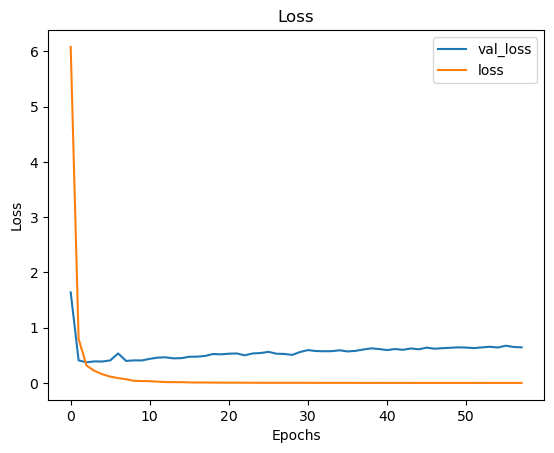

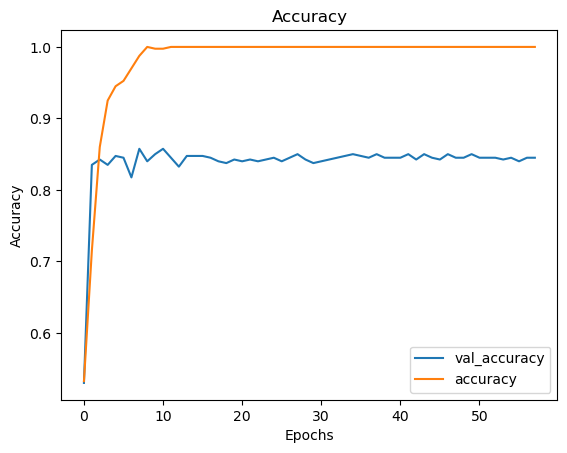

In [821]:
visualize_training_results(base_result)

In [822]:
base_model.evaluate(test_images, test_labels)

13/13 [==============================] - 1s 103ms/step - loss: 0.5217 - accuracy: 0.8650


[0.5216954946517944, 0.8650000095367432]

- As you can see from the graph there is a massive amount of overfitting but the model did run which was the goal for the 
baseline model

### Regularization Model:
for this model I wanted to focus only on the overfitting in my model so that I could then measure how much complexity I could
add to increase the accuracy score on the test data

In [157]:
trainCallback = EarlyStopping(monitor='loss', min_delta = 0.0001, patience = 20)

L2_model = Sequential()

# I added the regularization to the convelutional layers because i figured that is where most of the overfitting is
L2_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', 
                    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), 
                    kernel_regularizer = regularizers.l2(0.005)))
L2_model.add(MaxPooling2D(pool_size = (2,2)))
L2_model.add(Flatten())

# dropout layers could also help with the overfitting
L2_model.add(Dropout(0.3))
L2_model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
L2_model.add(Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
L2_model.add(Dense(1, activation = 'sigmoid'))

L2_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [158]:
L2_result = L2_model.fit(train_images, 
                       train_y, 
                       validation_data= (test_images, test_y),
                       epochs = 300, 
                       callbacks = [trainCallback], 
                       batch_size = 32)

Epoch 1/300
4/4 [==============================] - 2s 420ms/step - loss: 7.9000 - accuracy: 0.5400 - val_loss: 2.6083 - val_accuracy: 0.5200
Epoch 2/300
4/4 [==============================] - 1s 347ms/step - loss: 2.5395 - accuracy: 0.4800 - val_loss: 2.5164 - val_accuracy: 0.6200
Epoch 3/300
4/4 [==============================] - 2s 455ms/step - loss: 2.4401 - accuracy: 0.6600 - val_loss: 3.1407 - val_accuracy: 0.4800
Epoch 4/300
4/4 [==============================] - 1s 348ms/step - loss: 2.3926 - accuracy: 0.7000 - val_loss: 2.4503 - val_accuracy: 0.6400
Epoch 5/300
4/4 [==============================] - 1s 379ms/step - loss: 2.2390 - accuracy: 0.8400 - val_loss: 2.4505 - val_accuracy: 0.6800
Epoch 6/300
4/4 [==============================] - 1s 287ms/step - loss: 1.9965 - accuracy: 0.9200 - val_loss: 2.2694 - val_accuracy: 0.6800
Epoch 7/300
4/4 [==============================] - 1s 295ms/step - loss: 1.9310 - accuracy: 0.9100 - val_loss: 2.1016 - val_accuracy: 0.7800
Epoch 8/300
4

Epoch 59/300
4/4 [==============================] - 1s 295ms/step - loss: 0.2634 - accuracy: 1.0000 - val_loss: 0.9663 - val_accuracy: 0.7400
Epoch 60/300
4/4 [==============================] - 1s 312ms/step - loss: 0.2501 - accuracy: 1.0000 - val_loss: 0.7780 - val_accuracy: 0.7000
Epoch 61/300
4/4 [==============================] - 1s 312ms/step - loss: 0.2340 - accuracy: 1.0000 - val_loss: 1.0735 - val_accuracy: 0.7400
Epoch 62/300
4/4 [==============================] - 1s 293ms/step - loss: 0.2451 - accuracy: 1.0000 - val_loss: 0.7927 - val_accuracy: 0.6800
Epoch 63/300
4/4 [==============================] - 1s 291ms/step - loss: 0.2401 - accuracy: 1.0000 - val_loss: 0.8916 - val_accuracy: 0.7800
Epoch 64/300
4/4 [==============================] - 1s 312ms/step - loss: 0.2233 - accuracy: 1.0000 - val_loss: 0.7955 - val_accuracy: 0.7000
Epoch 65/300
4/4 [==============================] - 1s 276ms/step - loss: 0.2184 - accuracy: 1.0000 - val_loss: 1.0300 - val_accuracy: 0.7400
Epoch 

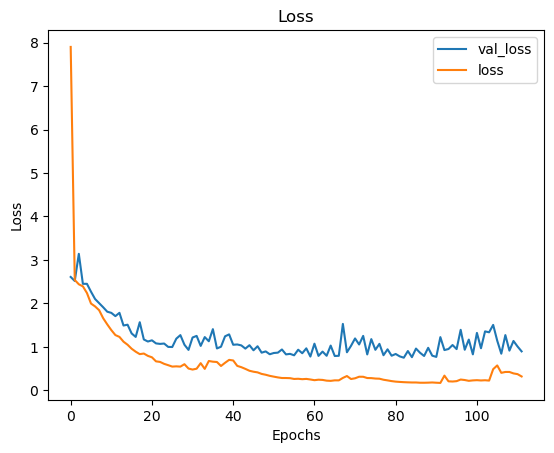

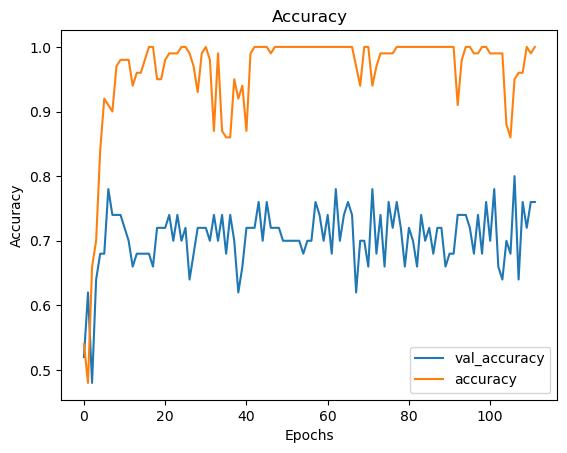

In [159]:
visualize_training_results(L2_result)

In [160]:
L2_model.evaluate(val_images, val_y)

1/1 [==============================] - 0s 34ms/step - loss: 1.1734 - accuracy: 0.7333


[1.173385739326477, 0.7333333492279053]

- You can see from the graph that the model does overfit less than before but the accuracy is still sparatic and unpredictable
- I will need to continue to tinker with the L2 regularization and the dropout layers until I can be sure that overfitting will not be an issue for my model

### Categorical Classification Model
For this model I wanted to experiment and see if adding in multi classification would increase the accuracy of the model. I would have the model split the fruit into 18 classes based on type of fruit, and the health of the fruit, to see if this would be more accurate than simply treating all the fruit the same way.

In [244]:
# this is a custom function for spliting up the fruits according to type to each of the train, test, and validation folders
def ttv_split(fruit, gb):
    old_dir = './multi_fruits/Processed Images_Fruits/{} Quality_Fruits/{}_{}/'.format(gb, fruit.capitalize(), gb)
    
    fruits = os.listdir(old_dir)
    fruit_train = sample(fruits, round(len(fruits) * 0.6))
    test_val = [x for x in fruits if x not in fruit_train]
    fruit_val = sample(test_val, round(len(test_val) * .375))
    fruit_test = [x for x in test_val if x not in fruit_val]

    os.mkdir('train')
    for image in fruit_train:
        new_path = 'train/' + image
        shutil.copy(old_dir + image, new_path)
    shutil.move('train', './multi_fruits/cat_rot/train/{}_{}'.format(fruit, gb))
    
    os.mkdir('test')
    for image in fruit_test:
        new_path = 'test/' + image
        shutil.copy(old_dir + image, new_path)
    shutil.move('test', './multi_fruits/cat_rot/test/{}_{}'.format(fruit, gb))
    
    os.mkdir('val')
    for image in fruit_val:
        new_path = 'val/' + image
        shutil.copy(old_dir + image, new_path)
    shutil.move('val', './multi_fruits/cat_rot/validation/{}_{}'.format(fruit, gb))


In [246]:
# this calls the custom function on each of the types of fruits
all_f = ['apple', 'banana', 'grape', 'guava', 'jujube', 'lime', 'orange', 'pomegranate', 'strawberry']
for f in all_f:
    ttv_split(f, 'Good')
    ttv_split(f, 'Bad')

In [259]:
# this formats the newly made classes into the 2d array of numbers like with the first model
cat_train_generator = img_datagen.flow_from_directory(
        'multi_fruits/cat_rot/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = 100,
        class_mode="categorical"
)

cat_test_generator = img_datagen.flow_from_directory(
        'multi_fruits/cat_rot/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = 50,
        class_mode="categorical"
)

cat_val_generator = img_datagen.flow_from_directory(
        'multi_fruits/cat_rot/validation',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = 15,
        class_mode="categorical"
)

Found 18472 images belonging to 18 classes.
Found 7696 images belonging to 18 classes.
Found 4619 images belonging to 18 classes.


In [260]:
cat_train_images, cat_train_labels = next(cat_train_generator)
cat_test_images, cat_test_labels = next(cat_test_generator)
cat_val_images, cat_val_labels = next(cat_val_generator)

In [287]:
cback = EarlyStopping(monitor='val_accuracy', min_delta = 0.0001, patience = 40)

model_2 = Sequential()
model_2.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', 
                   input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Conv2D(filters = 32, kernel_size = (4,4), activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))

#model_2.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
#model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Flatten())

#model_1.add(Dense(64, activation = 'relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(64, activation = 'relu'))
model_2.add(Dense(50, activation = 'relu'))
model_2.add(Dense(32, activation = 'relu'))

model_2.add(Dense(18, activation = 'softmax'))

model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [288]:
result_2 = model_2.fit(cat_train_images, 
                       cat_train_labels, 
                       validation_data= (cat_val_images, cat_val_labels),
                       epochs = 200, 
                       callbacks = [cback], 
                       batch_size = 32)

Epoch 1/200
4/4 [==============================] - 2s 306ms/step - loss: 3.0480 - accuracy: 0.0300 - val_loss: 2.8399 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 1s 278ms/step - loss: 2.8674 - accuracy: 0.1700 - val_loss: 2.8404 - val_accuracy: 0.4000
Epoch 3/200
4/4 [==============================] - 1s 280ms/step - loss: 2.8416 - accuracy: 0.2300 - val_loss: 2.6837 - val_accuracy: 0.4000
Epoch 4/200
4/4 [==============================] - 1s 275ms/step - loss: 2.7718 - accuracy: 0.2300 - val_loss: 2.4750 - val_accuracy: 0.4000
Epoch 5/200
4/4 [==============================] - 1s 244ms/step - loss: 2.6320 - accuracy: 0.2200 - val_loss: 2.3115 - val_accuracy: 0.4000
Epoch 6/200
4/4 [==============================] - 1s 255ms/step - loss: 2.5034 - accuracy: 0.2200 - val_loss: 2.0542 - val_accuracy: 0.4000
Epoch 7/200
4/4 [==============================] - 1s 252ms/step - loss: 2.3566 - accuracy: 0.2300 - val_loss: 1.9247 - val_accuracy: 0.4000
Epoch 8/2

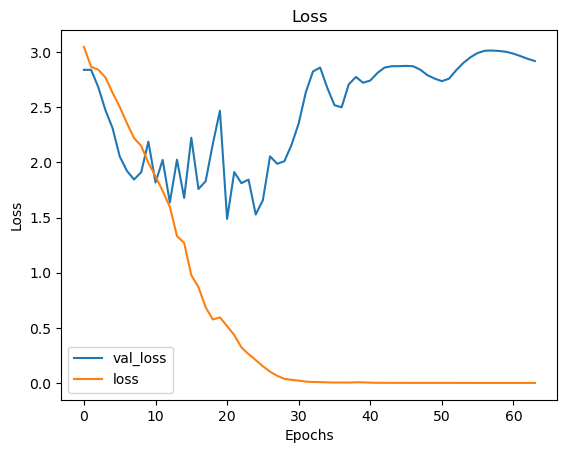

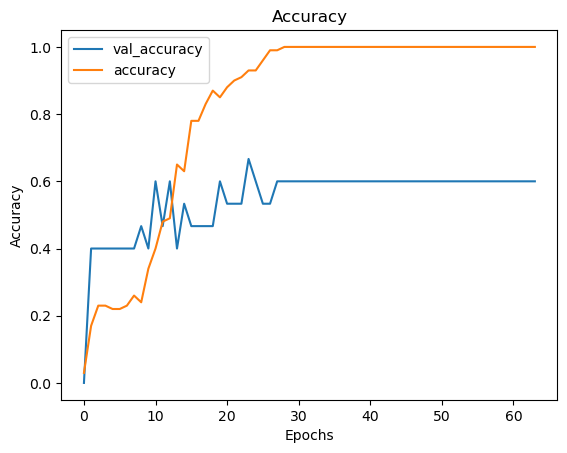

In [289]:
visualize_training_results(result_2)

In [290]:
model_2.evaluate(cat_val_images, cat_val_labels)

1/1 [==============================] - 0s 351ms/step - loss: 2.9197 - accuracy: 0.6000


[2.9197332859039307, 0.6000000238418579]

- From the model it is clear that with 18 classes it will take a lot more work to get this model to be anywhere close to accurate so instead I am going to go back to the binary classification and focus on hyperparamerterization

### Hyperparameter Tuning
Now I am going to tinker with the hyper parameters to raise the accuracy as much as possible without overfitting

In [2]:
# this custom function is for the decay of the learning rate and will allow the model to find the true accuracy faster
def scheduler(epoch, lr):
    if epoch < 15:
        return lr
    else:
        return lr * tf.math.exp(-0.06)

In [3]:
# I added in the learning rate decay function as well as a model checkpoint to capture the best model to see the moste accurate
# model that my neural network produces
early = [EarlyStopping(monitor='accuracy', min_delta = 0.002, patience = 10),
         ModelCheckpoint(filepath = 'best_model_256.h5', monitor = 'accuracy', save_best_only = True),
         LearningRateScheduler(scheduler)]
opt = Adam(learning_rate = 0.0007)

model_3 = Sequential()
model_3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', 
                   input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model_3.add(MaxPooling2D(pool_size = (2,2)))

#model_3.add(Dropout(0.3))

#model_3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
#model_3.add(MaxPooling2D(pool_size = (2,2)))

model_3.add(Flatten())


model_3.add(Dropout(0.3))
model_3.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
model_3.add(Dropout(0.2))
#model_1.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))

model_3.add(Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
model_3.add(Dropout(0.1))
#model_3.add(Dense(15, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))

#model_1.add(Dense(10, activation = 'relu'))
#model_3.add(Dropout(0.1))
model_3.add(Dense(1, activation = 'sigmoid'))

model_3.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

NameError: name 'IMAGE_SIZE' is not defined

In [1114]:
# I increased the batch size to help make the model run faster and because I found it produces much better results for 
# accuracy

result_3 = model_3.fit(train_images, 
                       train_labels, 
                       validation_data= (val_images, val_labels),
                       epochs = 300, 
                       callbacks = early, 
                       batch_size = 128)

Epoch 1/300
4/4 [==============================] - 6s 1s/step - loss: 2.1202 - accuracy: 0.5660 - val_loss: 1.7607 - val_accuracy: 0.4600 - lr: 7.0000e-04
Epoch 2/300
4/4 [==============================] - 4s 1s/step - loss: 1.8695 - accuracy: 0.5480 - val_loss: 1.5207 - val_accuracy: 0.5800 - lr: 7.0000e-04
Epoch 3/300
4/4 [==============================] - 5s 1s/step - loss: 1.5871 - accuracy: 0.6300 - val_loss: 1.3647 - val_accuracy: 0.7480 - lr: 7.0000e-04
Epoch 4/300
4/4 [==============================] - 4s 1s/step - loss: 1.4567 - accuracy: 0.6620 - val_loss: 1.3132 - val_accuracy: 0.7540 - lr: 7.0000e-04
Epoch 5/300
4/4 [==============================] - 4s 1s/step - loss: 1.2926 - accuracy: 0.7380 - val_loss: 1.2378 - val_accuracy: 0.7820 - lr: 7.0000e-04
Epoch 6/300
4/4 [==============================] - 4s 1s/step - loss: 1.1918 - accuracy: 0.8140 - val_loss: 1.1619 - val_accuracy: 0.7840 - lr: 7.0000e-04
Epoch 7/300
4/4 [==============================] - 3s 880ms/step - los

Epoch 53/300
4/4 [==============================] - 2s 629ms/step - loss: 0.3288 - accuracy: 0.9840 - val_loss: 0.5307 - val_accuracy: 0.8860 - lr: 7.1599e-05
Epoch 54/300
4/4 [==============================] - 2s 592ms/step - loss: 0.3232 - accuracy: 0.9880 - val_loss: 0.5293 - val_accuracy: 0.8880 - lr: 6.7429e-05
Epoch 55/300
4/4 [==============================] - 3s 742ms/step - loss: 0.3293 - accuracy: 0.9900 - val_loss: 0.5323 - val_accuracy: 0.8820 - lr: 6.3503e-05
Epoch 56/300
4/4 [==============================] - 2s 607ms/step - loss: 0.3158 - accuracy: 0.9880 - val_loss: 0.5314 - val_accuracy: 0.8820 - lr: 5.9804e-05
Epoch 57/300
4/4 [==============================] - 2s 616ms/step - loss: 0.3223 - accuracy: 0.9820 - val_loss: 0.5266 - val_accuracy: 0.8940 - lr: 5.6322e-05
Epoch 58/300
4/4 [==============================] - 2s 599ms/step - loss: 0.3262 - accuracy: 0.9760 - val_loss: 0.5261 - val_accuracy: 0.8940 - lr: 5.3042e-05
Epoch 59/300
4/4 [============================

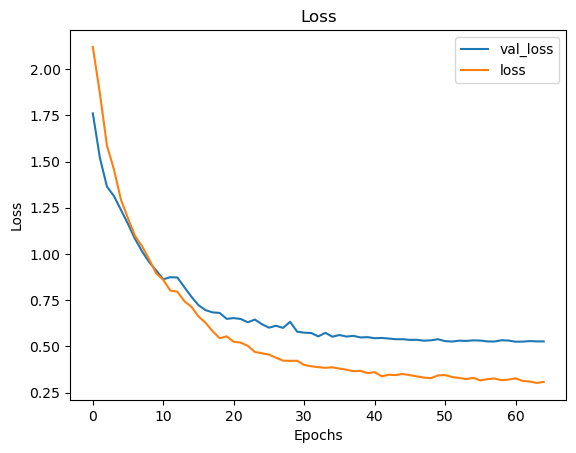

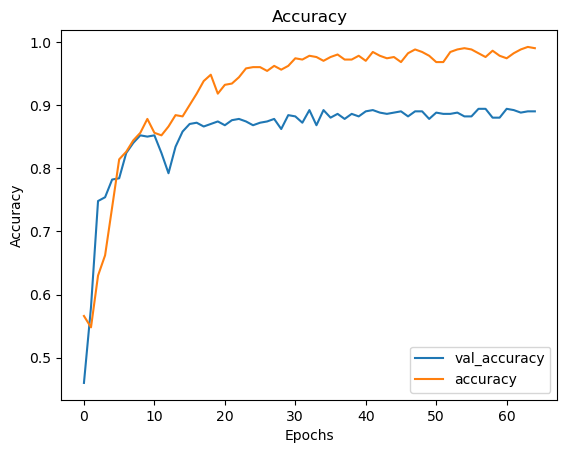

In [1115]:
visualize_training_results(result_3)

In [1116]:
model_3.evaluate(test_images, test_labels)

16/16 [==============================] - 1s 67ms/step - loss: 0.5550 - accuracy: 0.8840


[0.5550318360328674, 0.8840000033378601]

In [1117]:
# this will get the best model that the neural network generated 
testm = load_model('test_model.h5')
testm.evaluate(test_images, test_labels)

16/16 [==============================] - 1s 60ms/step - loss: 0.5545 - accuracy: 0.8820


[0.5544560551643372, 0.8820000290870667]

- this model is considerably better in terms of overfitting and overall accuracy thanks to the decay of the learning rate
and the tweaks made to the batch size and the convlutional layer. 

### Final Model
This final model will consist of even more hyperparameter tuning so that we might get all the way to 90% accuracy without overfitting too much

In [23]:
def scheduler(epoch, lr):
    if epoch < 15:
        return lr
    else:
        return lr * tf.math.exp(-0.06)

In [24]:
early = [EarlyStopping(monitor='val_accuracy', min_delta = 0.003, patience = 30),
         ModelCheckpoint(filepath = 'next_best_model_256.h5', monitor = 'accuracy', save_best_only = True),
         LearningRateScheduler(scheduler)]
opt = Adam(learning_rate = 0.001)

final_model = Sequential()
final_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', 
                   input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
final_model.add(MaxPooling2D(pool_size = (2,2)))

#final_model.add(Dropout(0.3))

#final_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
#final_model.add(MaxPooling2D(pool_size = (2,2)))

final_model.add(Flatten())


final_model.add(Dropout(0.4))
final_model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
final_model.add(Dropout(0.3))

final_model.add(Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
final_model.add(Dropout(0.2))
#final_model.add(Dense(10, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))

#final_model.add(Dropout(0.1))
final_model.add(Dense(1, activation = 'sigmoid'))

final_model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [25]:
result_final = final_model.fit(train_images, 
                       train_labels, 
                       validation_data= (val_images, val_labels),
                       epochs = 200, 
                       callbacks = early, 
                       batch_size = 100)

Epoch 1/200
4/4 [==============================] - 11s 3s/step - loss: 10.3044 - accuracy: 0.5400 - val_loss: 3.3357 - val_accuracy: 0.4350 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - 10s 3s/step - loss: 6.8356 - accuracy: 0.5525 - val_loss: 3.5803 - val_accuracy: 0.5925 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - 10s 3s/step - loss: 4.0111 - accuracy: 0.5750 - val_loss: 2.6336 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 4/200
4/4 [==============================] - 9s 3s/step - loss: 2.9475 - accuracy: 0.5950 - val_loss: 2.5282 - val_accuracy: 0.6475 - lr: 0.0010
Epoch 5/200
4/4 [==============================] - 9s 3s/step - loss: 2.6351 - accuracy: 0.6275 - val_loss: 2.5023 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 6/200
4/4 [==============================] - 9s 3s/step - loss: 2.4745 - accuracy: 0.6575 - val_loss: 2.3628 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 7/200
4/4 [==============================] - 10s 3s/step - loss: 2.2989 - accuracy: 

Epoch 54/200
4/4 [==============================] - 9s 2s/step - loss: 0.4399 - accuracy: 0.9525 - val_loss: 0.6515 - val_accuracy: 0.8550 - lr: 9.6328e-05


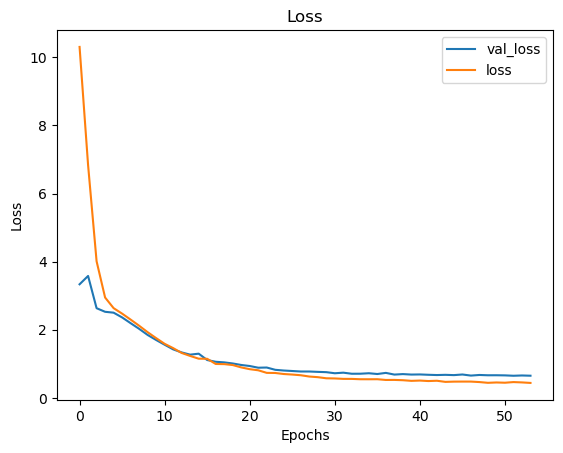

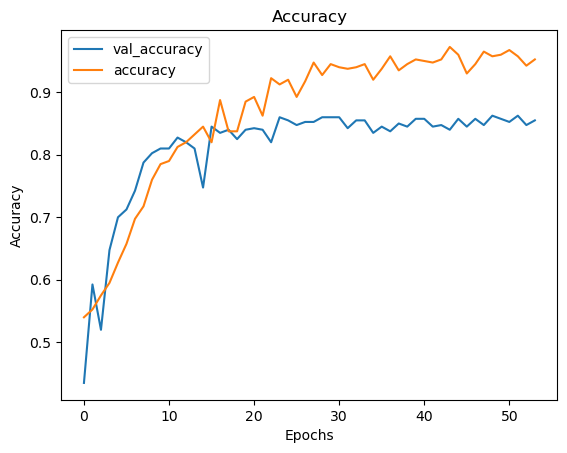

In [26]:
visualize_training_results(result_final)

In [27]:
final_model.evaluate(test_images, test_labels)

13/13 [==============================] - 1s 92ms/step - loss: 0.6621 - accuracy: 0.8325


[0.6620845198631287, 0.8324999809265137]

In [29]:
testp = load_model('next_best_model_256.h5')
testp.evaluate(test_images, test_labels)

13/13 [==============================] - 2s 166ms/step - loss: 0.6836 - accuracy: 0.8325


[0.6836304664611816, 0.8324999809265137]

- As you can clearly see my final model actually did worse than my fourth model despite my best efforst to try and tweak all of the hyperparameters
- because of this I am going to stick with my fourth model as my best model


## Results

For the final model I used the Convolutional layers, Dropout layers, and dense layers to get the highest accuracy scores possible. This model is not perfect but with 88% accuracy it was as good as I was going to get without completely restructering the model.


## Conclusions
My final model can predict whether or not a given fruit is rotten 88% of the time with a loss of 0.55 on average.


## Next Steps
- **Get a bigger dataset** with more advanced alternatives for each original photo
- Find photos that cover **more of the range of states of decay** for each kind of rotting fruit
- **Expand the variety of fruits** in the dataset to that the model can be used on a wider range of produce
- **Add another established neural network** to my model with transfer learning to make my model more accurate 
